## FINAL PROJECT

### TELCO CUSTOMER CHURN
#### SECTION 2 - MACHINE LEARNING

***The goal of this process is to predict the churned or not churned customers in order to help retain customers.*** 

In order to achieve this goal, we will be focusing on searching the best Machine Learning Model using some conditions below : 

- First, we split the data into 80% Train data and then we split the data into 90% Train data.


- Then we scale the data so that the're having the same scale.


- In each attempts we will be conducting the Logistic Regression, Random Forrest Classifier and KNearest Neighbors Models.


- Also we try to do the hyperparameter tuning then compare it between it's default models. 


- In last part we compare the result between models to achieve our goals.

### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import pylab

from scipy.stats import anderson
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

### LOAD DATA

In [2]:
df = pd.read_csv('Telco-Customer-Churn-Clean.csv')

In [3]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [4]:
df.tail()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1
7042,3186-AJIEK,Male,No,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,0


In [5]:
pd.DataFrame({'dataFeatures' : df.columns, 'dataType' : df.dtypes, 
              'null' : df.isna().sum(), 'unique' : df.nunique(), 
              'uniqueSample' : [list(df[i].drop_duplicates().sample(2))for i in df.columns]}).reset_index(drop = True)

,dataFeatures,dataType,null,unique,uniqueSample
0,customerID,object,0,7043,"[3508-CFVZL, 3235-ETOOB]"
1,Gender,object,0,2,"[Male, Female]"
2,SeniorCitizen,object,0,2,"[Yes, No]"
3,Partner,object,0,2,"[Yes, No]"
4,Dependents,object,0,2,"[No, Yes]"
5,Tenure,int64,0,73,"[26, 13]"
6,PhoneService,object,0,2,"[No, Yes]"
7,MultipleLines,object,0,3,"[No, No phone service]"
8,InternetService,object,0,3,"[DSL, No]"
9,OnlineSecurity,object,0,3,"[No, No internet service]"


In [6]:
df.describe(exclude='number').T

,count,unique,top,freq
customerID,7043,7043,7399-QHBJS,1
Gender,7043,2,Male,3555
SeniorCitizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088


In [7]:
df.describe()

,Tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,0.265370
std,24.559481,30.090047,2266.794470,0.441561
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,0.000000
50%,29.000000,70.350000,1394.550000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000
max,72.000000,118.750000,8684.800000,1.000000


### SCALING

Scaling means changing the range of the values of the datas. However the shape of the distribution doesn’t change. We do this so that our Models are having better prformance, as it can help features arrive in more digestible form for these algorithms. Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale. 

To scale our datas, there are some scaling methods we can choose according to their conditions. Typically there are :

- Standard Scaler : This method removes the mean and scales the data to unit variance. However, the outliers have an influence when computing the empirical mean and standard deviation which shrink the range of the feature values.


- Min Max Scaler : This method rescales the data set such that all feature values are in the range of 0 to 1. However, this scaling is very sensitive to the presence of outliers.


- Robust Scaler : Robust scaler centering and scaling statistics of this scaler are based on percentiles and are therefore not influenced by a few number of very large marginal outliers.

First we do goodness of fit test to our continous datas using anderson method below :

In [97]:
def normal(df):
    
    stat = anderson(df)[0]
    cval = anderson(df)[1][2]
    if stat < cval :
        print('NORMALLY Distributed for ' + col + ' Variable')
    else :
        print('NOT NORMALLY Distributed for ' + col + ' Variable')

In [98]:
df_cont = df.loc[:, df.dtypes != np.object].drop('Churn', axis = 1)

In [99]:
for col in df_cont :
    normal(df_cont[col])

NOT NORMALLY Distributed for Tenure Variable
NOT NORMALLY Distributed for MonthlyCharges Variable
NOT NORMALLY Distributed for TotalCharges Variable


As we can see the Anderson result indicated that our datas are not normally distributed. Let's visualize it using qqplot below :

<Figure size 720x360 with 0 Axes>

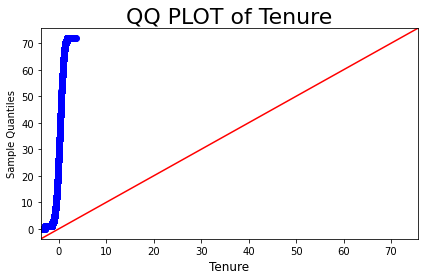

<Figure size 720x360 with 0 Axes>

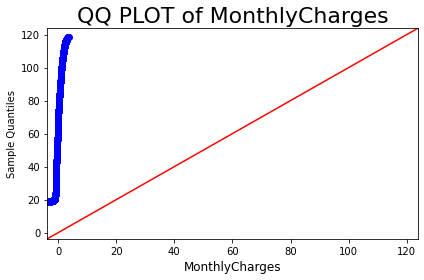

<Figure size 720x360 with 0 Axes>

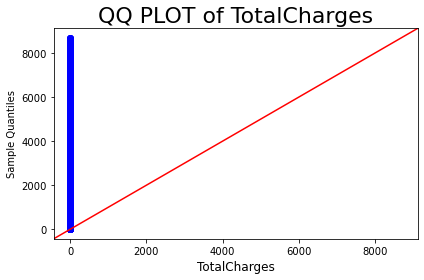

In [11]:
for col in df_cont :
    
    plt.figure(figsize = (10,5))
    
    sm.qqplot(df[col], line = '45')
    plt.xlabel(col, fontsize = 12)
    plt.title('QQ PLOT of ' + col, fontsize = 22)
    
    plt.tight_layout()
    plt.show()

The qq plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution (ex. Normal Distribution). If it is true, then we should see the data points forming a line that’s roughly straight. However, in this datas we see that the data points (it's the blue color) are not following the red line. Therefore we can assume that it's not coming from a Normal Distribution. Therefore we're not choosing the Standard Scaler, as there are more method to choose from. Hence we are moving to next test.

Below, I'd like to check whether our datas are having many outliers or not, because if it is, we're going to choose the Robust Scaler method.

In [101]:
def outliers(df):
    Q2 = np.quantile(df, 0.50)
    Q1 = np.quantile(df, 0.25)
    Q3 = np.quantile(df, 0.75)
    
    IQR   = (Q3 - Q1) * 1.5
    lower =  Q1 - IQR
    upper =  Q3 + IQR 

    outlier = ''
    for i in range(len(df)):
        if df[i] > upper :
            outlier = outlier + str(df[i]) + ', '
        if df[i] < lower :
            outlier = outlier + str(df[i]) + ', '
    return len(outlier)

In [102]:
for col in df_cont:
    outlier = outliers(df[col])
    print('There are', outlier, 'Outliers on', col, 'Variable')

There are 0 Outliers on Tenure Variable
There are 0 Outliers on MonthlyCharges Variable
There are 0 Outliers on TotalCharges Variable


Seems there are no outliers in our datas, I'll try to visualize it below with boxplot. The boxplot are mainly used to display the distribution of data based on a five number summary : minimum, first quartile (Q1), median, third quartile (Q3), and maximum. Therefore it can also detect the outliers.

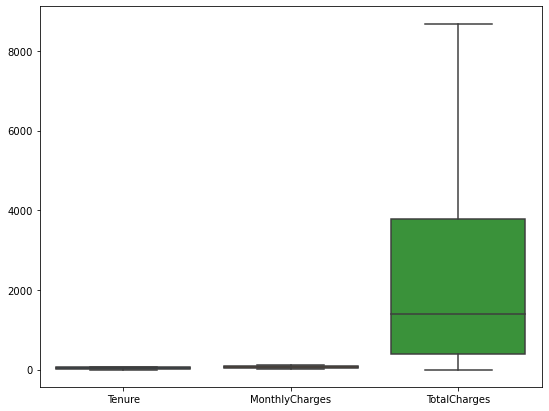

In [117]:
plt.figure(figsize = (9,7))
sns.boxplot(data=df_cont)
plt.show()

This proof that our datas does not have any outliers, so that using Robust Scaler is not necessary. Then this means that we will scale our datas using Min Max Scaler.

In [13]:
df_scaled = df.copy()

In [14]:
# using MinMax Scaler to scale data

df_scaled['Tenure'] = MinMaxScaler().fit_transform(df_scaled[['Tenure']])
df_scaled['MonthlyCharges'] = MinMaxScaler().fit_transform(df_scaled[['MonthlyCharges']])
df_scaled['TotalCharges'] = MinMaxScaler().fit_transform(df_scaled[['TotalCharges']])

In [15]:
df_scaled.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,0.013889,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.003437,0
1,5575-GNVDE,Male,No,No,No,0.472222,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,0.385075,0.217564,0
2,3668-QPYBK,Male,No,No,No,0.027778,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.012453,1
3,7795-CFOCW,Male,No,No,No,0.625000,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.211951,0
4,9237-HQITU,Female,No,No,No,0.027778,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.017462,1


From the data above we can see that we have successfully scaled our data. Let's try to visualize it using boxplot, and see the differences between before and after scaling.

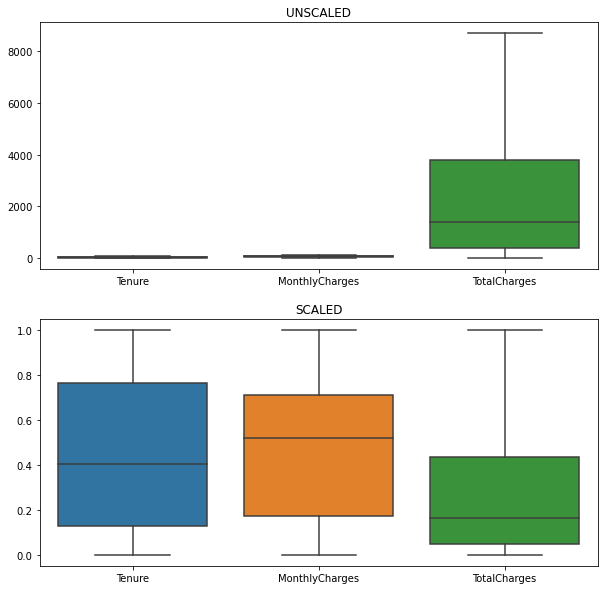

In [130]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10,10))

sns.boxplot(data = df_cont, ax=ax1).title.set_text('UNSCALED')
sns.boxplot(data = df_scaled.drop(columns = 'Churn'), ax=ax2).title.set_text('SCALED')

plt.show()

Now we're ready to move on to the prediction model building, but before that I'll create copy of our scaled, so that we're not getting mixed up in the process.

In [17]:
df_ready = df_scaled.copy()

I rather drop the *customerID* as it's just the same as index. 

In [18]:
df_ready = df_ready.drop('customerID', axis = 1)

I'll use `pd.get_dummies` to get our data labelled.

In [19]:
df_ready = pd.get_dummies(df_ready)

In [20]:
df_ready.head()

,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0.003437,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0.472222,0.385075,0.217564,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0.027778,0.354229,0.012453,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0.625000,0.239303,0.211951,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0.027778,0.521891,0.017462,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


#### PARAMETERS FOR HYPERPARAMETER

As mentioned, we will set our parameters for Hyperparameter tuning. A hyperparameter is a parameter whose value is used to control the machine learning process. Usually in most cases the models performed better by using this method.

In [21]:
#LogRegression
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [10, 100, 1000]
LRG_param = {'penalty' : penalty, 'solver': solver, 'max_iter' : max_iter}

In [22]:
#Random Forest
max_depth = [10, 20, 40, 'None']
min_samples_leaf = [2, 4]
min_samples_split = [2, 10]
n_estimators = [10, 100]

RFC_param = {'max_depth' : max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split' : min_samples_split, 'n_estimators' : n_estimators}

In [23]:
#KNN
leaf_size = list(range(1, 50))
n_neighbors = list(range(1, 30))
p=[1,2]

KNN_param = {'leaf_size' : leaf_size, 'n_neighbors' : n_neighbors, 'p' : p}

Now that we've finished our parameters, let's start building our predictive Models. I'll start by splitting our data to 80% Train and 20% test data, first.

### Splitting Train Data - 80%

In [24]:
df_80 = df_ready.copy()

In [25]:
x = df_80.drop(columns = ['Churn'])
y = df_80['Churn'].values

In [26]:
x.head()

,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0.003437,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0.472222,0.385075,0.217564,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0.027778,0.354229,0.012453,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0.625000,0.239303,0.211951,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0.027778,0.521891,0.017462,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


#### FITTING MODEL

In [27]:
#Split train data 80%, test data 20%
x_train, x_test, y_train, y_test =  train_test_split(x, y, train_size = 0.8, shuffle = False)

#Model
LRG = LogisticRegression().fit(x_train, y_train)
RFC = RandomForestClassifier().fit(x_train, y_train)
KNN = KNeighborsClassifier().fit(x_train, y_train)

#### HYPERPARAMETER

In [28]:
# Hyper
RSCV_LRG = RandomizedSearchCV(estimator = LRG, param_distributions = LRG_param, cv=5).fit(x_train, y_train)
RSCV_RFC = RandomizedSearchCV(estimator = RFC, param_distributions = RFC_param, cv=5).fit(x_train, y_train)
RSCV_KNN = RandomizedSearchCV(estimator = KNN, param_distributions = KNN_param, cv=5).fit(x_train, y_train)

In [29]:
print('best param LRG : ' ,RSCV_LRG.best_params_)
print('best param RFC : ' ,RSCV_RFC.best_params_)
print('best param KNN : ' ,RSCV_KNN.best_params_)

best param LRG :  {'solver': 'saga', 'penalty': 'l1', 'max_iter': 100}
best param RFC :  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
best param KNN :  {'p': 1, 'n_neighbors': 25, 'leaf_size': 38}


In [30]:
LRG_best = LogisticRegression(solver = 'lbfgs', penalty = 'none', max_iter = 10).fit(x_train, y_train)
RFC_best = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 4, max_depth = 40).fit(x_train, y_train)
KNN_best = KNeighborsClassifier(p = 2, n_neighbors = 28, leaf_size = 35).fit(x_train, y_train)

In [132]:
# test data
LRG_score = LRG.score(x_test,y_test)
RFC_score = RFC.score(x_test,y_test)
KNN_score = KNN.score(x_test,y_test)
LRG_best_score = LRG_best.score(x_test,y_test)
RFC_best_score = RFC_best.score(x_test,y_test)
KNN_best_score = KNN_best.score(x_test,y_test)

In [133]:
# train
LRG_score_tr = LRG.score(x_train,y_train)
RFC_score_tr = RFC.score(x_train,y_train)
KNN_score_tr = KNN.score(x_train,y_train)
LRG_best_score_tr = LRG_best.score(x_train,y_train)
RFC_best_score_tr = RFC_best.score(x_train,y_train)
KNN_best_score_tr = KNN_best.score(x_train,y_train)

In [32]:
model80_score = pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'KNNeighbors'], 
                              'Normal': [LRG_score, RFC_score, KNN_score], 
                              'Hyper' : [LRG_best_score, RFC_best_score, KNN_best_score]})

In [134]:
model80_train = pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'KNNeighbors'], 
                              'Normal': [LRG_score_tr, RFC_score_tr, KNN_score_tr], 
                              'Hyper' : [LRG_best_score_tr, RFC_best_score_tr, KNN_best_score_tr]})

In [137]:
pd.concat([model80_train, model80_score], keys = ['Train Score', 'Test Score'])

Model    Normal     Hyper
Train Score 0  LogRegression  0.805112  0.802449
            1   RandomForest  0.997693  0.873269
            2    KNNeighbors  0.834221  0.804402
Test Score  0  LogRegression  0.801278  0.801987
            1   RandomForest  0.796309  0.796309
            2    KNNeighbors  0.770759  0.790632

Seeing the test score result, we can see that our models indeed performed better using Hyperparameter, therefore we'll use hyperparameter tuned model for our prediction. But before that, by comparing our Train and Test Scores we can see that there are some overfitting in our data especially on Random Forest method. But we'll leave it for now, let's continue to the next step.

#### PREDICT

In [34]:
#Logistic Regression
yp_LRG = LRG_best.predict(x_test)

#Random Forest
yp_RFC = RFC_best.predict(x_test)

#KNNeighbors
yp_KNN = KNN_best.predict(x_test)

### MODEL

### Logistic Regression

In [35]:
cm_LRG = confusion_matrix(y_test, yp_LRG)
cm_LRG

array([[923, 105],
       [174, 207]], dtype=int64)

In [36]:
labels = ['Not Churned', 'Churned']

              precision    recall  f1-score   support

 Not Churned       0.84      0.90      0.87      1028
     Churned       0.66      0.54      0.60       381

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



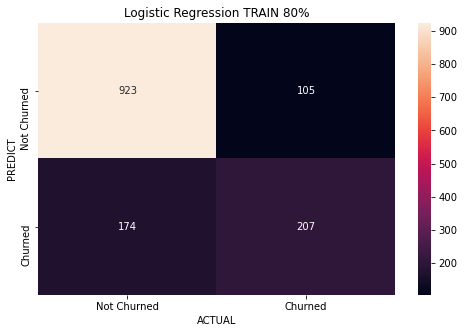

In [37]:
print(classification_report(y_test, yp_LRG, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_LRG, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel("ACTUAL")
plt.ylabel("PREDICT")
plt.show()

In [38]:
report_LRG = pd.DataFrame(classification_report(y_test, yp_LRG, target_names= labels, output_dict=True)).T

### Random Forest Classifier

In [39]:
cm_RFC = confusion_matrix(y_test, yp_RFC)
cm_RFC

array([[936,  92],
       [195, 186]], dtype=int64)

              precision    recall  f1-score   support

 Not Churned       0.83      0.91      0.87      1028
     Churned       0.67      0.49      0.56       381

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.78      0.80      0.79      1409



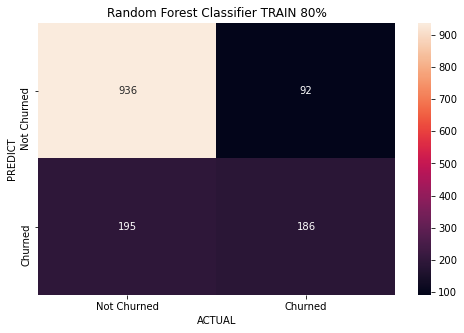

In [40]:
print(classification_report(y_test, yp_RFC, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_RFC, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Random Forest Classifier TRAIN 80%')
plt.xlabel("ACTUAL")
plt.ylabel("PREDICT")
plt.show()

In [41]:
report_RFC = pd.DataFrame(classification_report(y_test, yp_RFC, target_names= labels, output_dict=True)).T

### K-Nearest Neighbors

In [42]:
cm_KNN = confusion_matrix(y_test, yp_KNN)
cm_KNN

array([[903, 125],
       [170, 211]], dtype=int64)

              precision    recall  f1-score   support

 Not Churned       0.84      0.88      0.86      1028
     Churned       0.63      0.55      0.59       381

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.78      0.79      0.79      1409



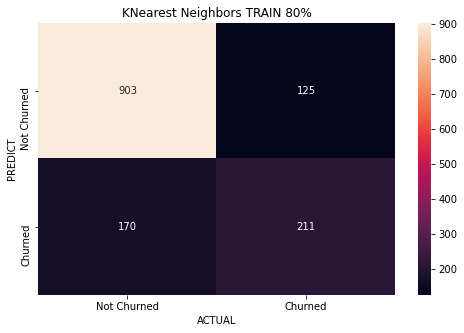

In [43]:
print(classification_report(y_test, yp_KNN, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_KNN, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('KNearest Neighbors TRAIN 80%')
plt.xlabel("ACTUAL")
plt.ylabel("PREDICT")
plt.show()

In [44]:
report_KNN = pd.DataFrame(classification_report(y_test, yp_KNN, target_names= labels, output_dict=True)).T

### Splitting Data - Train 90%

In [45]:
df_90 = df_ready.copy()

In [46]:
x1 = df_90.drop(columns = ['Churn'])
y1 = df_90['Churn'].values

In [47]:
x1.head()

,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0.003437,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0.472222,0.385075,0.217564,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0.027778,0.354229,0.012453,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0.625000,0.239303,0.211951,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0.027778,0.521891,0.017462,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


#### FITTING MODEL

In [48]:
#Split Train 90%
x1_train, x1_test, y1_train, y1_test =  train_test_split(x1, y1, train_size = 0.9, shuffle = False)

#Model
LRG1 = LogisticRegression().fit(x1_train, y1_train)
RFC1 = RandomForestClassifier().fit(x1_train, y1_train)
KNN1 = KNeighborsClassifier().fit(x1_train, y1_train)

#### HYPERPARAMETER TUNING

In [49]:
# Hyper
RSCV_LRG1 = RandomizedSearchCV(estimator = LRG1, param_distributions = LRG_param, cv=5).fit(x1_train, y1_train)
RSCV_RFC1 = RandomizedSearchCV(estimator = RFC1, param_distributions = RFC_param, cv=5).fit(x1_train, y1_train)
RSCV_KNN1 = RandomizedSearchCV(estimator = KNN1, param_distributions = KNN_param, cv=5).fit(x1_train, y1_train)

In [50]:
print('best param LRG1 : ' ,RSCV_LRG1.best_params_)
print('best param RFC1 : ' ,RSCV_RFC1.best_params_)
print('best param KNN1 : ' ,RSCV_KNN1.best_params_)

best param LRG1 :  {'solver': 'saga', 'penalty': 'l1', 'max_iter': 100}
best param RFC1 :  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10}
best param KNN1 :  {'p': 2, 'n_neighbors': 22, 'leaf_size': 32}


In [51]:
LRG1_best = LogisticRegression(solver = 'newton-cg', penalty = 'none', max_iter = 10).fit(x1_train, y1_train)
RFC1_best = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 2, max_depth = 40).fit(x1_train, y1_train)
KNN1_best = KNeighborsClassifier(p = 1, n_neighbors = 25, leaf_size = 18).fit(x1_train, y1_train)

In [52]:
LRG1_score = LRG1.score(x1_test,y1_test)
RFC1_score = RFC1.score(x1_test,y1_test)
KNN1_score = KNN1.score(x1_test,y1_test)
LRG1_best_score = LRG1_best.score(x1_test,y1_test)
RFC1_best_score = RFC1_best.score(x1_test,y1_test)
KNN1_best_score = KNN1_best.score(x1_test,y1_test)

In [53]:
model90_score = pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'KNNeighbors'], 
                              'Normal': [LRG1_score, RFC1_score, KNN1_score], 
                              'Hyper' : [LRG1_best_score, RFC1_best_score, KNN1_best_score]})

In [54]:
model90_score

,Model,Normal,Hyper
0,LogRegression,0.797163,0.798582
1,RandomForest,0.795745,0.792908
2,KNNeighbors,0.777305,0.797163


#### PREDICT

In [55]:
#Logistic Regression
yp_LRG1 = LRG1_best.predict(x1_test)

#Random Forest
yp_RFC1 = RFC1_best.predict(x1_test)

#KNNeighbors
yp_KNN1 = KNN1_best.predict(x1_test)

### MODEL

### Logistic Regression 

In [56]:
cm_LRG1 = confusion_matrix(y1_test, yp_LRG1)
cm_LRG1

array([[461,  49],
       [ 93, 102]], dtype=int64)

              precision    recall  f1-score   support

 Not Churned       0.83      0.90      0.87       510
     Churned       0.68      0.52      0.59       195

    accuracy                           0.80       705
   macro avg       0.75      0.71      0.73       705
weighted avg       0.79      0.80      0.79       705



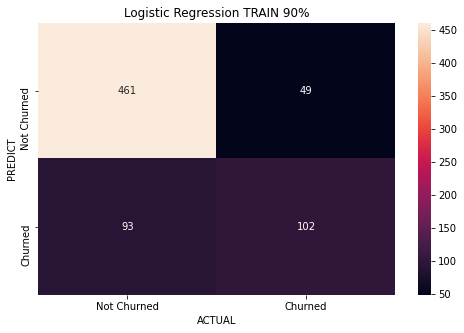

In [57]:
print(classification_report(y1_test, yp_LRG1, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_LRG1, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 90%')
plt.xlabel("ACTUAL")
plt.ylabel("PREDICT")
plt.show()

In [58]:
report_LRG1 = pd.DataFrame(classification_report(y1_test, yp_LRG1, target_names= labels, output_dict=True)).T

### Random Forest Classifier

In [59]:
cm_RFC1 = confusion_matrix(y1_test, yp_RFC1)
cm_RFC1

array([[466,  44],
       [102,  93]], dtype=int64)

              precision    recall  f1-score   support

 Not Churned       0.82      0.91      0.86       510
     Churned       0.68      0.48      0.56       195

    accuracy                           0.79       705
   macro avg       0.75      0.70      0.71       705
weighted avg       0.78      0.79      0.78       705



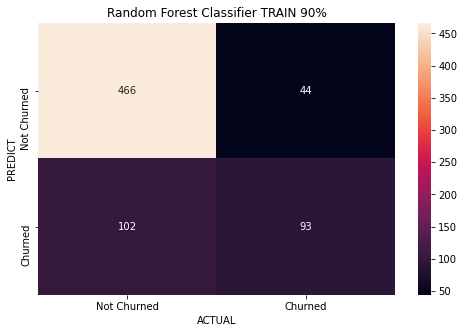

In [60]:
print(classification_report(y1_test, yp_RFC1, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_RFC1, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Random Forest Classifier TRAIN 90%')
plt.xlabel("ACTUAL")
plt.ylabel("PREDICT")
plt.show()

In [61]:
report_RFC1 = pd.DataFrame(classification_report(y1_test, yp_RFC1, target_names= labels, output_dict=True)).T

### K-Nearest Neighbors

In [62]:
cm_KNN1 = confusion_matrix(y1_test, yp_KNN1)
cm_KNN1

array([[446,  64],
       [ 79, 116]], dtype=int64)

              precision    recall  f1-score   support

 Not Churned       0.85      0.87      0.86       510
     Churned       0.64      0.59      0.62       195

    accuracy                           0.80       705
   macro avg       0.75      0.73      0.74       705
weighted avg       0.79      0.80      0.79       705



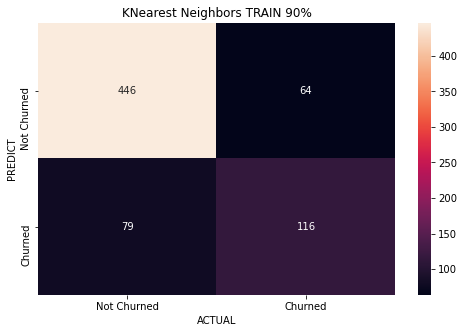

In [63]:
print(classification_report(y1_test, yp_KNN1, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_KNN1, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('KNearest Neighbors TRAIN 90%')
plt.xlabel("ACTUAL")
plt.ylabel("PREDICT")
plt.show()

In [64]:
report_KNN1 = pd.DataFrame(classification_report(y1_test, yp_KNN1, target_names= labels, output_dict=True)).T

### SUMMARY

### Logistic Regression Comparison

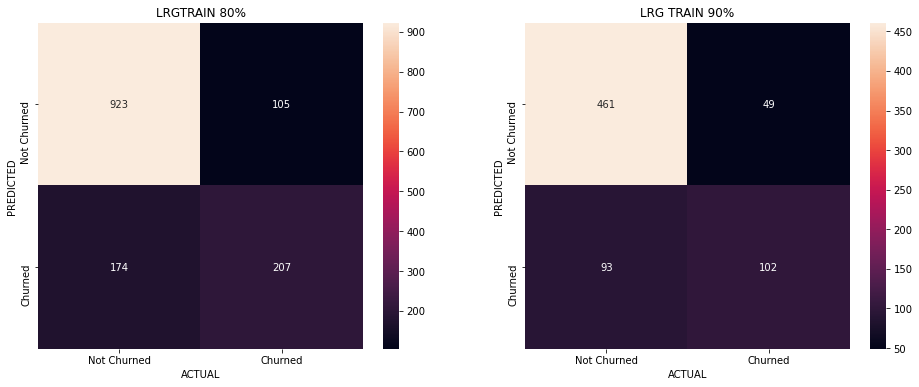

In [65]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(cm_LRG, annot=True, fmt=".0f", ax=ax1)
sns.heatmap(cm_LRG1, annot=True, fmt=".0f", ax=ax2)

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)

ax1.set_title('LRGTRAIN 80%'), ax2.set_title('LRG TRAIN 90%')
ax1.set_xlabel('ACTUAL'), ax2.set_xlabel('ACTUAL')
ax1.set_ylabel('PREDICTED'), ax2.set_ylabel('PREDICTED')

plt.show()

In [66]:
pd.concat([report_LRG, report_LRG1], keys = ['LRG TRAIN 80%', 'LRG TRAIN 90%'])

precision    recall  f1-score      support
LRG TRAIN 80% Not Churned    0.841386  0.897860  0.868706  1028.000000
              Churned        0.663462  0.543307  0.597403   381.000000
              accuracy       0.801987  0.801987  0.801987     0.801987
              macro avg      0.752424  0.720584  0.733054  1409.000000
              weighted avg   0.793274  0.801987  0.795344  1409.000000
LRG TRAIN 90% Not Churned    0.832130  0.903922  0.866541   510.000000
              Churned        0.675497  0.523077  0.589595   195.000000
              accuracy       0.798582  0.798582  0.798582     0.798582
              macro avg      0.753813  0.713499  0.728068   705.000000
              weighted avg   0.788806  0.798582  0.789939   705.000000

### Random Forest Comparison

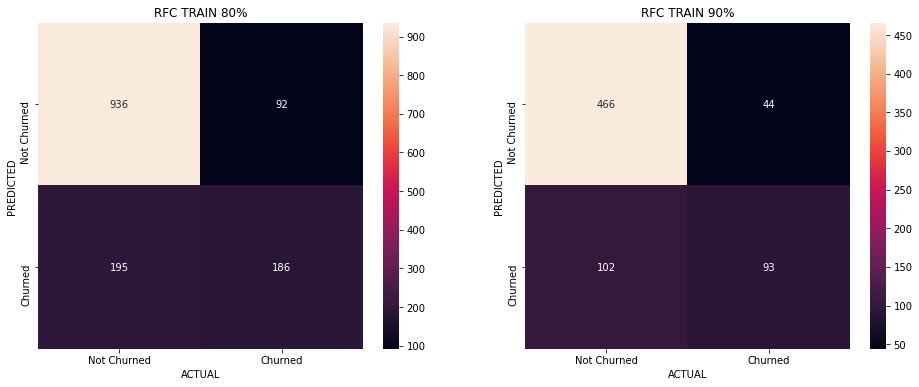

In [67]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(cm_RFC, annot=True, fmt=".0f", ax=ax1)
sns.heatmap(cm_RFC1, annot=True, fmt=".0f", ax=ax2)

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)

ax1.set_title('RFC TRAIN 80%'), ax2.set_title('RFC TRAIN 90%')
ax1.set_xlabel('ACTUAL'), ax2.set_xlabel('ACTUAL')
ax1.set_ylabel('PREDICTED'), ax2.set_ylabel('PREDICTED')

plt.show()

In [68]:
pd.concat([report_RFC, report_RFC1], keys = ['RFC TRAIN 80%', 'RFC TRAIN 90%'])

precision    recall  f1-score      support
RFC TRAIN 80% Not Churned    0.827586  0.910506  0.867068  1028.000000
              Churned        0.669065  0.488189  0.564492   381.000000
              accuracy       0.796309  0.796309  0.796309     0.796309
              macro avg      0.748325  0.699347  0.715780  1409.000000
              weighted avg   0.784721  0.796309  0.785250  1409.000000
RFC TRAIN 90% Not Churned    0.820423  0.913725  0.864564   510.000000
              Churned        0.678832  0.476923  0.560241   195.000000
              accuracy       0.792908  0.792908  0.792908     0.792908
              macro avg      0.749627  0.695324  0.712402   705.000000
              weighted avg   0.781259  0.792908  0.780390   705.000000

### K-Nearest Neighbors Comparison

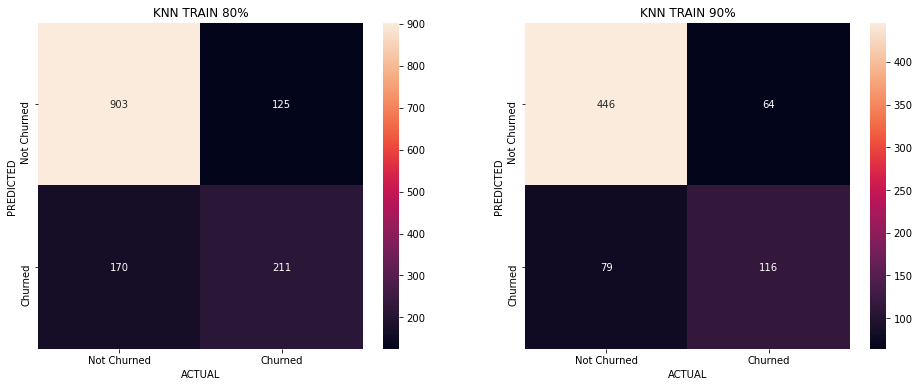

In [69]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(cm_KNN, annot=True, fmt=".0f", ax=ax1)
sns.heatmap(cm_KNN1, annot=True, fmt=".0f", ax=ax2)

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)

ax1.set_title('KNN TRAIN 80%'), ax2.set_title('KNN TRAIN 90%')
ax1.set_xlabel('ACTUAL'), ax2.set_xlabel('ACTUAL')
ax1.set_ylabel('PREDICTED'), ax2.set_ylabel('PREDICTED')

plt.show()

In [70]:
pd.concat([report_KNN, report_KNN1], keys = ['KNN TRAIN 80%', 'KNN TRAIN 90%'])

precision    recall  f1-score      support
KNN TRAIN 80% Not Churned    0.841566  0.878405  0.859591  1028.000000
              Churned        0.627976  0.553806  0.588563   381.000000
              accuracy       0.790632  0.790632  0.790632     0.790632
              macro avg      0.734771  0.716105  0.724077  1409.000000
              weighted avg   0.783810  0.790632  0.786304  1409.000000
KNN TRAIN 90% Not Churned    0.849524  0.874510  0.861836   510.000000
              Churned        0.644444  0.594872  0.618667   195.000000
              accuracy       0.797163  0.797163  0.797163     0.797163
              macro avg      0.746984  0.734691  0.740251   705.000000
              weighted avg   0.792800  0.797163  0.794576   705.000000

### SMOTE

In [71]:
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x_train.copy(), y_train.copy())
x1_resampled, y1_resampled = smote.fit_resample(x1_train.copy(), y1_train.copy())

In [72]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 0 to 5633
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Tenure                                   5634 non-null   float64
 1   MonthlyCharges                           5634 non-null   float64
 2   TotalCharges                             5634 non-null   float64
 3   Gender_Female                            5634 non-null   uint8  
 4   Gender_Male                              5634 non-null   uint8  
 5   SeniorCitizen_No                         5634 non-null   uint8  
 6   SeniorCitizen_Yes                        5634 non-null   uint8  
 7   Partner_No                               5634 non-null   uint8  
 8   Partner_Yes                              5634 non-null   uint8  
 9   Dependents_No                            5634 non-null   uint8  
 10  Dependents_Yes                           5634 no

In [73]:
x_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8292 entries, 0 to 8291
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Tenure                                   8292 non-null   float64
 1   MonthlyCharges                           8292 non-null   float64
 2   TotalCharges                             8292 non-null   float64
 3   Gender_Female                            8292 non-null   uint8  
 4   Gender_Male                              8292 non-null   uint8  
 5   SeniorCitizen_No                         8292 non-null   uint8  
 6   SeniorCitizen_Yes                        8292 non-null   uint8  
 7   Partner_No                               8292 non-null   uint8  
 8   Partner_Yes                              8292 non-null   uint8  
 9   Dependents_No                            8292 non-null   uint8  
 10  Dependents_Yes                           8292 no